# 05_04: Smoothing Time Series Data

In [132]:
import math
import collections
import urllib

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

%matplotlib inline

In [133]:
# 导入getweather模块，用于获取天气数据
import getweather

def fillnans(array):
    # 创建一个与输入数组长度相同的索引数组x
    x = np.arange(len(array))
    # 确定输入数组中哪些元素不是NaN，并将其对应的索引存储在good中
    good = ~np.isnan(array)
    # 使用numpy的interp函数对输入数组进行线性插值，将NaN值替换为插值后的值
    return np.interp(x, x[good], array[good])


In [134]:
# 调用getweather模块中的getyear函数，获取2000年HILO地区的天气数据
# 参数['TMIN','TMAX']表示获取最低温度和最高温度数据
hilo = getweather.getyear('HILO', ['TMIN','TMAX'], 2000)


In [135]:
# 使用fillnans函数填充hilo数据中的'TMIN'和'TMAX'列的NaN值
hilo['TMIN'], hilo['TMAX'] = fillnans(hilo['TMIN']), fillnans(hilo['TMAX'])


In [136]:
# 计算并输出hilo数据中'TMIN'列的平均值、最小值和最大值
np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])


(19.102739726027398, 14.4, 23.3)

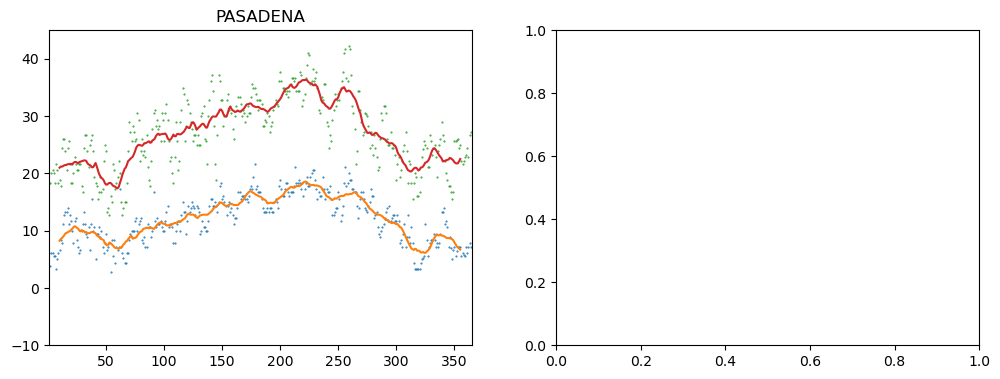

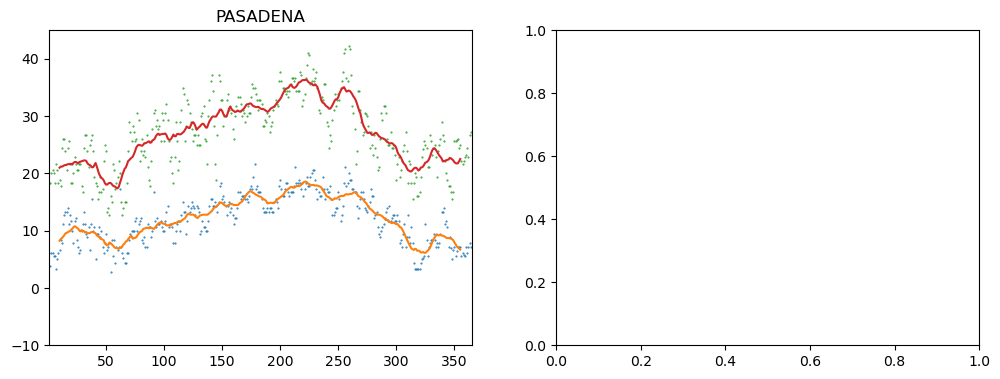

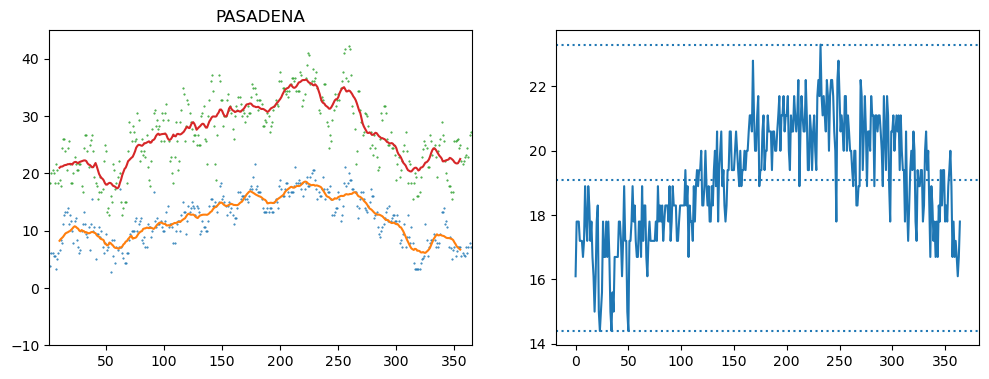

In [137]:
# 使用pp库绘制hilo数据中'TMIN'列的折线图
pp.plot(hilo['TMIN'])

# 遍历计算得到的'TMIN'列的平均值、最小值和最大值
for value in [np.mean(hilo['TMIN']), np.min(hilo['TMIN']), np.max(hilo['TMIN'])]:
    # 在图中添加一条水平直线，表示平均值、最小值或最大值
    pp.axhline(value, linestyle=':')

# 显示图形
pp.show()


In [138]:
# 计算并返回hilo数据中'TMIN'列的平均值
mean = np.mean(hilo['TMIN'])
# 计算并返回hilo数据中'TMIN'列的标准差
err = math.sqrt(np.var(hilo['TMIN']))


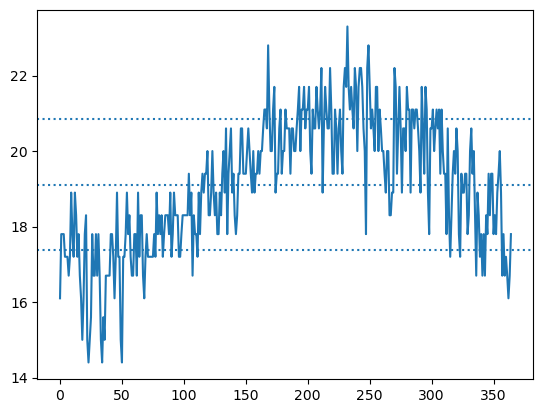

In [139]:
# 使用pp库绘制hilo数据中'TMIN'列的折线图
pp.plot(hilo['TMIN'])

# 遍历计算得到的'TMIN'列的平均值、平均值减去标准差和平均值加上标准差
for value in [mean, mean - err, mean + err]:
    # 在图中添加一条水平直线，表示平均值、平均值减去标准差或平均值加上标准差
    pp.axhline(value, linestyle=':')

# 显示图形
pp.show()


In [140]:
# 从getweather模块中获取2000年HILO地区的降水量数据
# 参数['PRCP']表示获取降水量数据
# 返回值['PRCP']表示获取到的降水量数据
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']


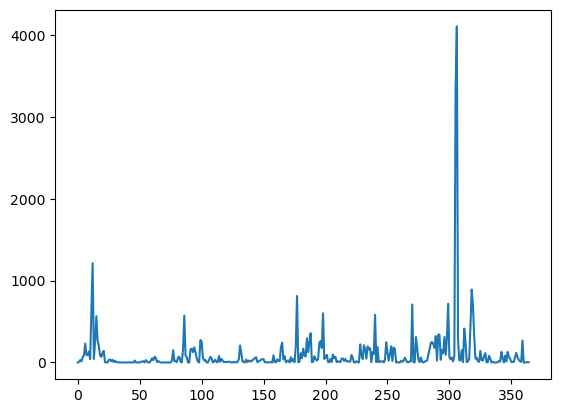

In [141]:
pp.plot(rain)
pp.show()

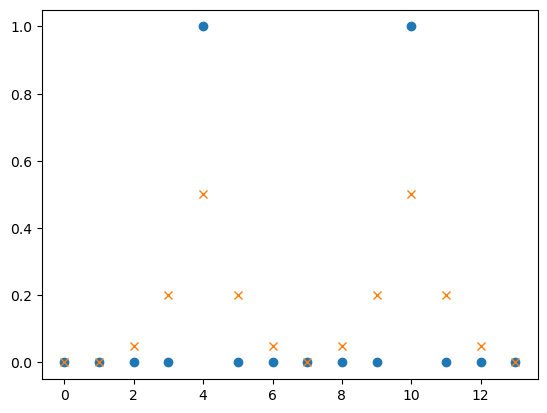

In [142]:
# 创建一个包含0和1的数组x
x = np.array([0,0,0,0,1,0,0,0,0,0,1,0,0,0])

# 创建一个用于平滑的掩码数组mask
mask = np.array([0.05,0.2,0.5,0.2,0.05])

# 使用numpy的correlate函数对x进行平滑处理，得到平滑后的数组y
y = np.correlate(x, mask, 'same')

# 使用pp库绘制原始数据x的折线图
pp.plot(x, 'o')

# 使用pp库绘制平滑后数据y的折线图
pp.plot(y, 'x')

# 显示图形
pp.show()


In [143]:
# 创建一个长度为10的数组，其中每个元素的值都是0.1
# 这个数组可以用作平滑处理的掩码，其中每个元素的权重相同
np.ones(10) / 10


array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

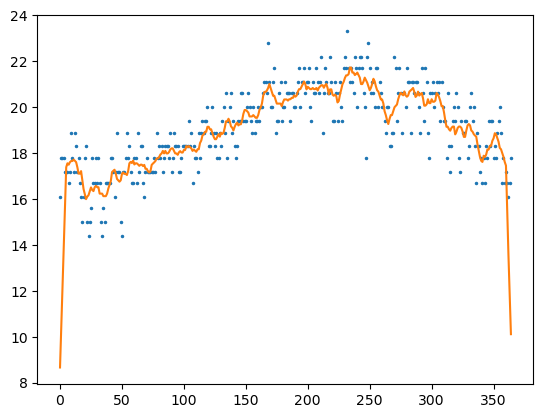

In [144]:
# 使用pp库绘制hilo数据中'TMIN'列的散点图，点的大小为3
pp.plot(hilo['TMIN'], '.', ms=3)

# 使用numpy的correlate函数对hilo数据中'TMIN'列进行平滑处理，平滑窗口大小为10
# 并使用pp库绘制平滑后的数据
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'same'))

pp.show()


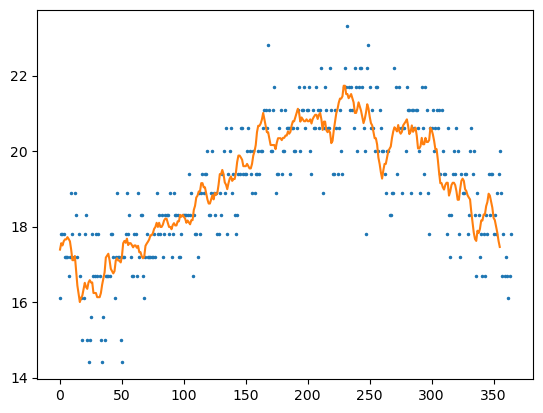

In [145]:
# 使用pp库绘制hilo数据中'TMIN'列的散点图，点的大小为3
pp.plot(hilo['TMIN'], '.', ms=3)

# 使用numpy的correlate函数对hilo数据中'TMIN'列进行平滑处理，平滑窗口大小为10
# 并使用pp库绘制平滑后的数据，只保留有效的卷积结果
pp.plot(np.correlate(hilo['TMIN'], np.ones(10)/10, 'valid'))

pp.show()

In [146]:
# smooth any array

def smooth(array, window=10, mode='valid'):
    """
    对输入数组进行平滑处理。

    参数:
    array (numpy.ndarray): 需要平滑的输入数组。
    window (int, 可选): 平滑窗口的大小，默认为10。
    mode (str, 可选): 卷积模式，默认为'valid'，表示只返回卷积中完全重叠的部分。

    返回:
    numpy.ndarray: 平滑后的数组。
    """
    # 创建一个长度为window的数组，其中每个元素的值都是1/window
    # 这个数组可以用作平滑处理的掩码，其中每个元素的权重相同
    mask = np.ones(window) / window

    # 使用numpy的correlate函数对输入数组进行平滑处理
    # 并返回平滑后的数组
    return np.correlate(array, mask, mode)


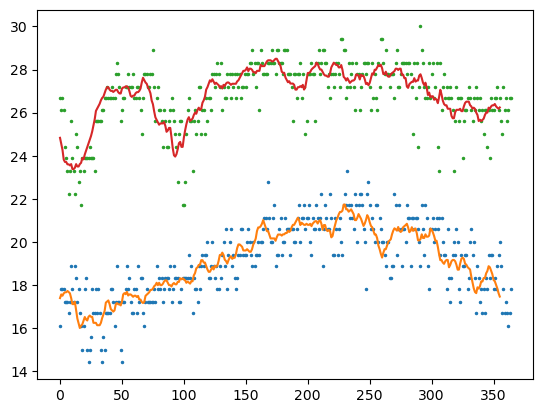

In [147]:
# 绘制hilo数据中'TMIN'列的散点图，点的大小为3
pp.plot(hilo['TMIN'], '.', ms=3)

# 对hilo数据中'TMIN'列进行平滑处理，平滑窗口大小为10，并绘制平滑后的曲线
pp.plot(smooth(hilo['TMIN'], 10))

# 绘制hilo数据中'TMAX'列的散点图，点的大小为3
pp.plot(hilo['TMAX'], '.', ms=3)

# 对hilo数据中'TMAX'列进行平滑处理，平滑窗口大小为10，并绘制平滑后的曲线
pp.plot(smooth(hilo['TMAX'], 10))

pp.show()


In [148]:
# 定义一个函数plotsmooth，用于绘制指定气象站和年份的气温数据，并对其进行平滑处理
def plotsmooth(station, year):
    # 调用getweather.getyear函数获取指定气象站和年份的气温数据，包括TMIN和TMAX
    stationdata = getweather.getyear(station, ['TMIN','TMAX'], year)

    # 遍历观测类型TMIN和TMAX
    for obs in ['TMIN','TMAX']:   
        # 调用fillnans函数填充缺失值
        stationdata[obs] = fillnans(stationdata[obs])
    
        # 绘制原始数据的散点图，点的大小为1
        pp.plot(stationdata[obs], '.', ms=1)
        # 绘制平滑后的数据，平滑窗口大小为20
        pp.plot(range(10,356), smooth(stationdata[obs], 20))
    
    # 设置图表标题为气象站名称
    pp.title(station)
    # 设置图表的x轴范围为1到365，y轴范围为-10到45
    pp.axis(xmin=1, xmax=365, ymin=-10, ymax=45)



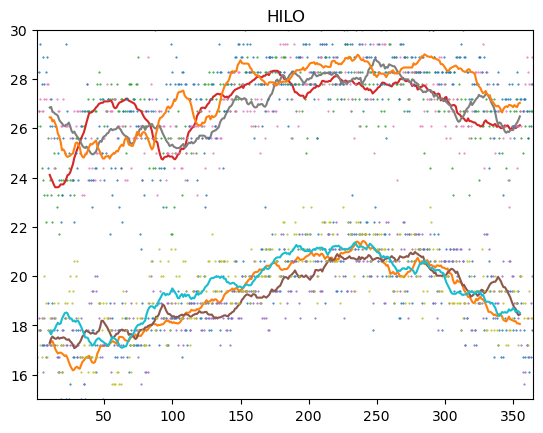

In [149]:
# 调用plotsmooth函数，绘制HILO气象站2000年的气温数据，并进行平滑处理
plotsmooth('HILO', 2000)
# 调用plotsmooth函数，绘制HILO气象站2001年的气温数据，并进行平滑处理
plotsmooth('HILO', 2001)
# 调用plotsmooth函数，绘制HILO气象站2002年的气温数据，并进行平滑处理
plotsmooth('HILO', 2002)

# 设置图表的y轴范围为15到30
pp.axis(ymin=15,ymax=30)

pp.show()


In [150]:
# 设置图形的大小为12x9
pp.figure(figsize=(12,9))

# 遍历城市列表中的每个城市
for i, city in enumerate(['PASADENA','NEW YORK','SAN DIEGO','MINNEAPOLIS']):
    # 在2x2的子图中选择第i+1个子图
    pp.subplot(2,2,i+1)
    # 调用plotsmooth函数，绘制指定城市2000年的气温数据，并进行平滑处理
    plotsmooth(city, 2000)


KeyError: "['TMIN', 'TMAX'] not in index"